# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [18]:
from pandas._config import describe_option
link = 'https://raw.githubusercontent.com/Claudio2022/CP1-IOT/main/carros.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Claudio2022/CP1-IOT/main/carros.csv')
df.info()
df.isnull()
df = df.dropna(axis = 0)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [19]:
df['km'] = df['Mileage/1000'] * 1000 * 1.60934
df = df.drop(['Mileage/1000'], axis = 1)
df

traducao = {
    'Brand' : 'marca',
    'Price' : 'preço',
    'Body' : 'tipo',
    'EngineV' : 'motor',
    'Engine Type' : 'combustivel',
    'Registration' : 'cadastro',
    'Year' : 'Ano',
    'Model' : 'modelo',
}
df = df.rename(columns=traducao)

df

,marca,preço,tipo,motor,combustivel,cadastro,Ano,modelo,km
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320,445787.18
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212,687188.18
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500,576143.72
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7,386241.60
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4,193120.80
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,1.6,Petrol,yes,2014,Corolla,56326.90
4340,Mercedes-Benz,125000.0,sedan,3.0,Diesel,yes,2014,S 350,14484.06
4341,BMW,6500.0,sedan,3.5,Petrol,yes,1999,535,1609.34
4342,BMW,8000.0,sedan,2.0,Petrol,yes,1985,520,312211.96


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

<Axes: >

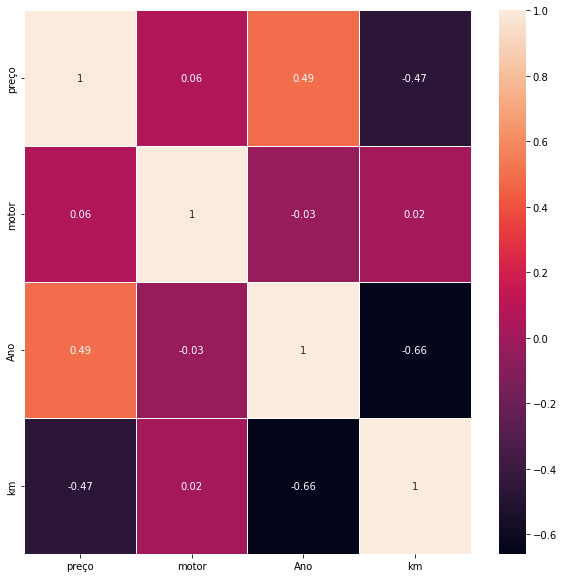

In [20]:
import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta:  Aprendizagem de máquina supervisionada, porque entregamos os dados e a correlação entre os dados esperando assim que através disso a IA encontre algo a mais.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: Aprendizagem de máquina supervisionada de regressão, porque através dos dados de entrada e de saida ela consegue prever algum outro tipo de saida.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: KM 

Algoritmo 2: ANO

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [21]:
X = df.drop(['km'], axis=1)              ### teste com todas as entradas

Y = df['km']             
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

Formato das tabelas de dados (4025, 8) e saidas (4025,)
(3220, 8)
(805, 8)
(3220,)
(805,)


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [22]:
X_treino.head()

,marca,preço,tipo,motor,combustivel,cadastro,Ano,modelo
2882,Volkswagen,5300.0,vagon,1.6,Gas,yes,1995,Passat B4
4035,Mercedes-Benz,5000.0,sedan,2.2,Diesel,no,2004,E-Class
2313,Volkswagen,34000.0,crossover,3.0,Diesel,yes,2012,Touareg
1533,Audi,62000.0,vagon,3.0,Diesel,yes,2015,A6 Allroad
305,Toyota,13900.0,hatch,1.6,Petrol,yes,2012,Auris


7.2 - Algoritmo 2:  (0,5)

In [23]:
Y_treino.head()

2882    416819.06
4035    386241.60
2313    148059.28
1533     38624.16
305     144840.60
Name: km, dtype: float64

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta:

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

ValueError: ignored